In [3]:
from sklearn import tree
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import time

In [4]:
sample, label = datasets.make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1, 
                   center_box=(-12.0, 12.0), shuffle=False, random_state=40)
trans = [[0.6, -0.6], [-0.4, 0.8]]
sample = np.dot(sample, trans)

In [5]:
clf = RandomTreesEmbedding(n_estimators=100, random_state=0, max_depth=5)
clf.fit(sample)
forest = clf.estimators_

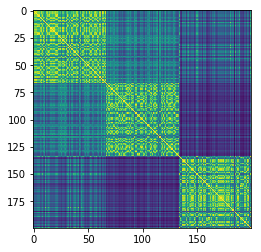

In [16]:
t = time.time()
path = clf.decision_path(sample)[0].todense()
d2 = path.dot(path.T)
d2 = d2 / 100
t1 = time.time()-t
plt.imshow(d2)

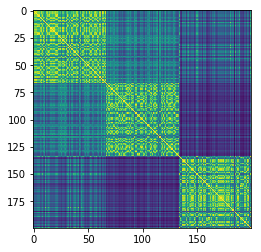

In [9]:
t = time.time()
d = np.zeros([200, 200])

for k in range(100):
    
    tree = forest[k]
    
    path = tree.decision_path(sample).todense()
    
    for i in range(200):
        for j in range(200):
            sample_ids = [i, j]
            d[i, j] = d[i, j]+(path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            

d = d / 100
t2 = time.time()-t
plt.imshow(d)

In [17]:
t1, t2

(0.13464021682739258, 66.23291563987732)

In [39]:
clf = RandomTreesEmbedding(n_estimators=100, random_state=0, max_depth=5)
clf.fit(sample)
forest = clf.estimators_

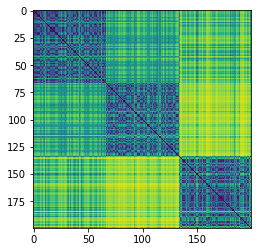

In [40]:
t = time.time()
path = np.array(clf.decision_path(sample)[0].todense())
depth = (path*path).sum(1)
depth = np.tile(depth, (200, 1))+np.tile(depth.T, (200, 1))
d1 = depth-2*path.dot(path.T)
d1 = d1 / 100
t1 = time.time()-t
plt.imshow(d1)

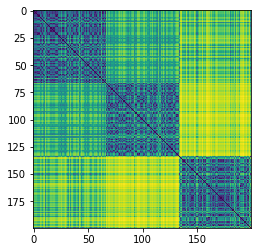

In [41]:
t = time.time()
d = np.zeros([200, 200])
    
for k in range(100):
    
    tree = forest[k]
    
    path = tree.decision_path(sample).todense()
        
    for i in range(200):
        for j in range(200):
            sample_ids = [i, j]
            splitting_depth = (path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            depth_i = (path[[i, i]].sum(axis=0) == len(sample_ids)).sum()
            depth_j = (path[[j, j]].sum(axis=0) == len(sample_ids)).sum()
            d[i, j] = d[i, j]+depth_i+depth_j-2*splitting_depth

d2 = d / 100
t2 = time.time()-t
plt.imshow(d2)

In [42]:
t1, t2

(0.2967548370361328, 195.90040612220764)

0.8441247274451658
0.8441247274451658


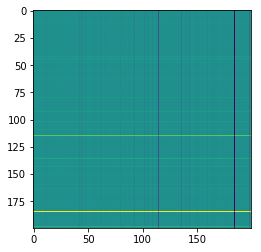

In [45]:
plt.imshow(d1-d2)
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
    
pred = cluster.fit_predict(d1)
score = adjusted_rand_score(label, pred)
print(score)
pred = cluster.fit_predict(d2)
score = adjusted_rand_score(label, pred)
print(score)